In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('train.csv')

#신고인부호, 수입자부호, 특송업체부호 삭제
#과세가격원화금액, hs10단위부호, 적출국가코드, 원산지국가코드, 관세율구분코드, 관세율 도 삭제
df = df.drop(['신고인부호','관세율','수입자부호'], axis=1)

In [13]:
#신고일자
df['신고일자'] = pd.to_datetime(df['신고일자'])
df.insert(1, '신고일자_월', df['신고일자'].dt.month)
df = df.drop('신고일자', axis=1)

In [15]:
df.sample(3)

,신고번호,신고일자_월,통관지세관부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,우범여부,핵심적발
65712,366824,8,13,NaN,22DM56,2,1,80,21,11,25467.1,1.000914e+06,40,3012226,4414000000,CN,CN,FCN1,0,0
54349,459163,7,40,NaN,NaN,1,1,11,21,11,4967.4,8.198756e+03,10,4002001,3926909000,CN,CN,FCN1,0,0
58730,303828,7,30,SFPY08Z,NaN,2,1,11,21,18,3999.7,4.539547e+05,40,1351002,8708999000,CN,CN,A,0,0


In [10]:
#수입통관계획코드 label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = df['수입통관계획코드']
le.fit(label)
label_encoded = le.transform(label)

l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['수입통관계획코드'] = l_e_df
df['수입통관계획코드'].unique()

#수입신고구분코드 label encoding
label = df['수입신고구분코드']
le.fit(label)
label_encoded = le.transform(label)

l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['수입신고구분코드'] = l_e_df
df['수입신고구분코드'].unique()


array([0, 1, 3, 2])

In [16]:
#원핫인코딩
df=pd.get_dummies(data = df, columns = ['HS10단위부호','신고일자_월','해외거래처부호','통관지세관부호','수입통관계획코드', '수입신고구분코드',
   '수입거래구분코드','수입종류코드','징수형태코드','적출국가코드', '특송업체부호', '원산지국가코드','관세율구분코드',
   '운송수단유형코드','반입보세구역부호'], prefix = ['HS10단위부호','신고일자_월','해외거래처부호','통관지세관부호','수입통관계획코드', '수입신고구분코드',
   '수입거래구분코드','수입종류코드','징수형태코드','적출국가코드', '특송업체부호', '원산지국가코드','관세율구분코드',
   '운송수단유형코드','반입보세구역부호'])

In [17]:
#표준화
from sklearn.preprocessing import StandardScaler

sdscaler=StandardScaler()
sdscaler.fit(df)
df_scaled=sdscaler.transform(df)
df_scaled=pd.DataFrame(data=df_scaled,columns=c1)

#정규화
from sklearn.preprocessing import MinMaxScaler

mMscaler= MinMaxScaler()
mMscaler.fit(df)
df_scaled=mMscaler.transform(df)
df_scaled=pd.DataFrame(data=df_scaled,columns=c1)

ValueError: Shape of passed values is (89619, 8039), indices imply (89619, 16)

In [149]:
df.sample(3)

,신고번호,신고중량(KG),과세가격원화금액,관세율,우범여부,핵심적발,HS10단위부호_101291000,HS10단위부호_106199000,HS10단위부호_106901000,HS10단위부호_106903010,...,반입보세구역부호_15106004,반입보세구역부호_15113371,반입보세구역부호_15116008,반입보세구역부호_15116255,반입보세구역부호_15118004,반입보세구역부호_15211051,반입보세구역부호_15211082,반입보세구역부호_15307010,반입보세구역부호_15402001,반입보세구역부호_15499999
37110,287333,337.1,409991.55020,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37668,187449,5405.8,10275.29394,6.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89007,396375,4299.2,19681.54230,3.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#feature importance 새로
#신고번호 빼고

c1=['통관지세관부호','수입통관계획코드', '수입신고구분코드', '과세가격원화금액','HS10단위부호',
   '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)', '적출국가코드',
   '운송수단유형코드','반입보세구역부호','우범여부','핵심적발', '원산지국가코드','관세율구분코드']

c2=['통관지세관부호','수입통관계획코드', '수입신고구분코드', '과세가격원화금액','HS10단위부호',
   '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)', '적출국가코드',
   '운송수단유형코드','반입보세구역부호','우범여부','원산지국가코드','관세율구분코드']

c3=['통관지세관부호','수입통관계획코드', '수입신고구분코드', '과세가격원화금액','HS10단위부호',
   '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)','적출국가코드',
   '운송수단유형코드','반입보세구역부호','원산지국가코드','관세율구분코드']


In [7]:
# log 

df['신고중량(KG)'] = np.log(df['신고중량(KG)'])
df['과세가격원화금액'] = np.log(df['과세가격원화금액'])

C:\Users\82108\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [152]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X = np.array(pd.DataFrame(df, columns=c3))  #우범여부X, 핵심적발X
X1 = np.array(pd.DataFrame(df, columns=c2)) #우범여부O, 핵심적발X --> 우범여부 고려해서 핵심적발
Y_1 = np.array(pd.DataFrame(df, columns=['우범여부']))
Y_2 = np.array(pd.DataFrame(df, columns=['핵심적발']))

In [153]:
from xgboost import XGBClassifier

#데이터 분할_우범여부
X_train, X_test, y1_train, y1_test = train_test_split(X, Y_1, test_size=0.2, random_state=11)
#데이터 학습 ----------------------------------------------------------------------------------수치들 잘 몰라서 일단 ppt따라했움..
dt_clf_1 = XGBClassifier(n_estimators=400,learning_rate=0.1, max_depth=150)
evals1=[(X_test,y1_test)]
dt_clf_1.fit(X_train, y1_train,early_stopping_rounds=10,eval_metric="logloss", eval_set=evals1,verbose=True)
dt_prediction_1=dt_clf_1.predict(X_test)
dt_prediction_1_proba=dt_clf_1.predict_proba(X_test)[:,1]

pd.set_option('display.max_seq_items', None)


XGBoostError: [21:48:39] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/data/data.cc:945: Check failed: valid: Input data contains `inf` or `nan`

In [105]:
from xgboost import XGBClassifier

#데이터 분할_핵심적발
X1_train, X1_test, y2_train, y2_test = train_test_split(X1, Y_2, test_size=0.2, random_state=11)

#데이터 학습-----------------------------------------------여기는 logloss했더니 에러나고 에러문에서 힌트라면서 mlogloss 쓰라길래...
dt_clf_2 = XGBClassifier(n_estimators=400,learning_rate=0.1, max_depth=150)
evals2=[(X1_test, y2_test)]
dt_clf_2.fit(X1_train, y2_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=evals2, verbose=True)
dt_prediction_2=dt_clf_2.predict(X1_test)
dt_prediction_2_proba=dt_clf_2.predict_proba(X1_test)[:,1]
pd.set_option('display.max_seq_items', None)

[0]	validation_0-mlogloss:0.97821
[1]	validation_0-mlogloss:0.87865
[2]	validation_0-mlogloss:0.79486
[3]	validation_0-mlogloss:0.72352
[4]	validation_0-mlogloss:0.66194
[5]	validation_0-mlogloss:0.60849
[6]	validation_0-mlogloss:0.56199
[7]	validation_0-mlogloss:0.52125
[8]	validation_0-mlogloss:0.48545
[9]	validation_0-mlogloss:0.45420
[10]	validation_0-mlogloss:0.42667
[11]	validation_0-mlogloss:0.40214
[12]	validation_0-mlogloss:0.38028
[13]	validation_0-mlogloss:0.36101
[14]	validation_0-mlogloss:0.34371
[15]	validation_0-mlogloss:0.32850
[16]	validation_0-mlogloss:0.31467
[17]	validation_0-mlogloss:0.30251
[18]	validation_0-mlogloss:0.29171
[19]	validation_0-mlogloss:0.28196
[20]	validation_0-mlogloss:0.27314
[21]	validation_0-mlogloss:0.26543
[22]	validation_0-mlogloss:0.25847
[23]	validation_0-mlogloss:0.25240
[24]	validation_0-mlogloss:0.24695
[25]	validation_0-mlogloss:0.24156
[26]	validation_0-mlogloss:0.23691
[27]	validation_0-mlogloss:0.23276
[28]	validation_0-mlogloss:0.2

In [106]:
#우범여부_정확도, 정밀도, 재현율, f1확인
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

def get_clf_eval1(y1_test, pred=None,pred_proba=None):
    accuracy = accuracy_score(y1_test, dt_prediction_1)
    precision = precision_score(y1_test, dt_prediction_1)
    recall = recall_score(y1_test, dt_prediction_1)
    f1 = f1_score(y1_test, dt_prediction_1)

    print("정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}".format(accuracy,precision,recall,f1))

In [107]:
get_clf_eval1(y1_test,dt_prediction_1,dt_prediction_1_proba)

정확도: 0.7487, 정밀도:0.3452, 재현율: 0.1767, F1: 0.2338


## f1 점수가 너무 낮은데 이유가 뭘까...

feature importances:
[0.    0.    0.    0.305 0.    0.    0.    0.    0.41  0.    0.285 0.
 0.    0.    0.   ]
통관지세관부호 : 0.000
수입통관계획코드 : 0.000
수입신고구분코드 : 0.000
과세가격원화금액 : 0.305
HS10단위부호 : 0.000
수입거래구분코드 : 0.000
수입종류코드 : 0.000
징수형태코드 : 0.000
신고중량(KG) : 0.410
적출국가코드 : 0.000
관세율 : 0.285
운송수단유형코드 : 0.000
반입보세구역부호 : 0.000
원산지국가코드 : 0.000
관세율구분코드 : 0.000


<AxesSubplot:>

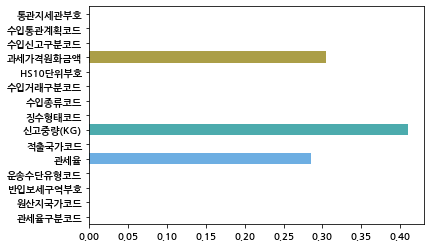

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

print("feature importances:\n{0}".format(np.round(dt_clf_1.feature_importances_,3)))

for name, value in zip(c3, dt_clf_1.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x=dt_clf_1.feature_importances_, y=c3)

#중요도가 이게 맞는걸까..? 표랑 우리 중요도랑 좀 다루네...ㅎ

## 너무 데이터가 극단적이야...

In [118]:
#테스트 데이터 불러오기
t_df = pd.read_csv('test.csv')


#신고일자, 해외거래처부호, 특송업체부호 삭제
t_df = t_df.drop(['신고인부호'], axis=1)

In [119]:
#원핫인코딩
t_df=pd.get_dummies(data = t_df, columns = ['HS10단위부호','신고일자','수입자부호','해외거래처부호','통관지세관부호','수입통관계획코드', '수입신고구분코드',
   '수입거래구분코드','수입종류코드','징수형태코드','적출국가코드', '특송업체부호', '원산지국가코드','관세율구분코드',
   '운송수단유형코드','반입보세구역부호'], prefix = ['HS10단위부호','신고일자','수입자부호','해외거래처부호','통관지세관부호','수입통관계획코드', '수입신고구분코드',
   '수입거래구분코드','수입종류코드','징수형태코드','적출국가코드', '특송업체부호', '원산지국가코드','관세율구분코드',
   '운송수단유형코드','반입보세구역부호'])

# Log
t_df['신고중량(KG)'] = np.log(t_df['신고중량(KG)'])
t_df['과세가격원화금액'] = np.log(t_df['과세가격원화금액'])
t_df['관세율'] = np.log(t_df['관세율'])

t_df.fillna(0)

,신고번호,신고중량(KG),과세가격원화금액,관세율,HS10단위부호_101291000,HS10단위부호_106901000,HS10단위부호_106903010,HS10단위부호_203291000,HS10단위부호_206491000,HS10단위부호_207141010,...,반입보세구역부호_15002001,반입보세구역부호_15106004,반입보세구역부호_15113371,반입보세구역부호_15116008,반입보세구역부호_15116255,반입보세구역부호_15118004,반입보세구역부호_15211051,반입보세구역부호_15211082,반입보세구역부호_15307010,반입보세구역부호_15402001
0,982834,8.224673,14.829032,3.295837,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,828961,8.765068,13.655091,-inf,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,522066,8.669897,11.087195,2.079442,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,999547,8.242309,13.843697,1.098612,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,919320,8.241624,14.332623,-inf,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,857321,8.027215,10.255522,1.163151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10269,621501,7.375068,15.111412,0.955511,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10270,998367,7.796593,14.889466,-inf,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10271,697376,9.045973,11.941159,-inf,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X1_test = np.array(pd.DataFrame(t_df, columns = c3)) #t_df에 우범여부X, 핵심적발X ==> c3
t_dt_prediction_1 = dt_clf_1.predict(X1_test)

t_df['우범여부']=t_dt_prediction_1 #예측한 우범여부 t_df에 추가

X2_test = np.array(pd.DataFrame(t_df, columns = c2)) #t_df에 우범여부O, 핵심적발X ==> c2
t_dt_prediction_2 = dt_clf_2.predict(X2_test)

In [121]:
test_result = pd.DataFrame()
test_result['신고번호'] = t_df['신고번호']
test_result['우범여부'] = t_dt_prediction_1
test_result['핵심적발'] = t_dt_prediction_2

test_result

,신고번호,우범여부,핵심적발
0,982834,0,0
1,828961,1,1
2,522066,0,0
3,999547,0,0
4,919320,1,1
...,...,...,...
10268,857321,0,0
10269,621501,0,0
10270,998367,1,1
10271,697376,1,1


In [122]:
test_result.to_csv("output.csv", encoding='utf-8-sig',index=False, header=True)

In [123]:
df_output = pd.read_csv('output.csv')

In [124]:
df_output['우범여부'].value_counts()

0    7291
1    2982
Name: 우범여부, dtype: int64

In [125]:
df_output['핵심적발'].value_counts()

0    7291
1    2982
Name: 핵심적발, dtype: int64

In [126]:
df['우범여부'].value_counts()

0    69836
1    19783
Name: 우범여부, dtype: int64

In [49]:
df['핵심적발'].value_counts()

0    69836
2    10224
1     9559
Name: 핵심적발, dtype: int64

In [50]:
df

,신고번호,신고중량(KG),우범여부,핵심적발,통관지세관부호_10,통관지세관부호_12,통관지세관부호_13,통관지세관부호_14,통관지세관부호_16,통관지세관부호_17,...,반입보세구역부호_15106004,반입보세구역부호_15113371,반입보세구역부호_15116008,반입보세구역부호_15116255,반입보세구역부호_15118004,반입보세구역부호_15211051,반입보세구역부호_15211082,반입보세구역부호_15307010,반입보세구역부호_15402001,반입보세구역부호_15499999
0,37453,8.338449,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,150339,8.984318,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,55710,5.505332,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,413154,8.397351,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,223511,8.426042,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89614,219831,8.316789,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89615,53949,8.536604,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89616,481979,8.461300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89617,265106,8.563351,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
